# Classification models 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data 

In [2]:
dataFrame = pd.read_csv('..\..\..\datasets\Human_Activity\data_glasses_with_labels_Act.csv')

In [3]:
dataFrame.head()

,Unnamed: 0,DATE,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,EOG_L,EOG_R,EOG_H,EOG_V,activity,index_activity,start_point_activity
0,0,2017/06/29 19:59:15.360,-3909,10146,-12051,-498,237,-40,-161,74,-235,43,Walk,8.0,2017-06-29 16:45
1,1,2017/06/29 19:59:15.380,-3891,10106,-12094,-501,305,-85,-164,70,-234,47,Walk,8.0,2017-06-29 16:45
2,2,2017/06/29 19:59:15.400,-3861,10110,-12147,-475,320,-83,-170,70,-240,50,Walk,8.0,2017-06-29 16:45
3,3,2017/06/29 19:59:15.420,-3820,10161,-12109,-425,346,-47,-197,67,-264,65,Walk,8.0,2017-06-29 16:45
4,4,2017/06/29 19:59:15.440,-3772,10088,-12118,-361,365,18,-206,34,-240,86,Walk,8.0,2017-06-29 16:45


In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538734 entries, 0 to 1538733
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1538734 non-null  int64  
 1   DATE                  1538734 non-null  object 
 2   ACC_X                 1538734 non-null  int64  
 3   ACC_Y                 1538734 non-null  int64  
 4   ACC_Z                 1538734 non-null  int64  
 5   GYRO_X                1538734 non-null  int64  
 6   GYRO_Y                1538734 non-null  int64  
 7   GYRO_Z                1538734 non-null  int64  
 8   EOG_L                 1538734 non-null  int64  
 9   EOG_R                 1538734 non-null  int64  
 10  EOG_H                 1538734 non-null  int64  
 11  EOG_V                 1538734 non-null  int64  
 12  activity              1538734 non-null  object 
 13  index_activity        1538734 non-null  float64
 14  start_point_activity  1538734 non-

#### we take only 20 percent of the data because the table is too big and the sample rate is too high and we have a lot of data

In [5]:
sampled_dataFrame_Glasses = dataFrame.sample(frac=0.2, random_state=42)
#sampled_dataFrame_Glasses.head()
sorted_sampled_dataFrame_Glasses = sampled_dataFrame_Glasses.sort_values(by='DATE')
sorted_sampled_dataFrame_Glasses.head()


,Unnamed: 0,DATE,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,EOG_L,EOG_R,EOG_H,EOG_V,activity,index_activity,start_point_activity
11,11,2017/06/29 19:59:15.580,-3464,10128,-12061,-347,437,346,-197,49,-246,74,Walk,8.0,2017-06-29 16:45
14,14,2017/06/29 19:59:15.640,-3350,10284,-12016,-499,311,423,-194,48,-242,73,Walk,8.0,2017-06-29 16:45
23,23,2017/06/29 19:59:15.820,-2958,10359,-12139,49,342,284,-185,21,-206,82,Walk,8.0,2017-06-29 16:45
29,29,2017/06/29 19:59:15.940,-2985,10260,-12221,-27,-46,395,-161,47,-208,57,Walk,8.0,2017-06-29 16:45
30,30,2017/06/29 19:59:15.960,-2887,10285,-12125,24,-82,358,-176,52,-228,62,Walk,8.0,2017-06-29 16:45


In [6]:
FeaturesTable = sorted_sampled_dataFrame_Glasses.drop(columns=['Unnamed: 0','index_activity','activity','start_point_activity','DATE'])
FeaturesTable.head()

,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,EOG_L,EOG_R,EOG_H,EOG_V
11,-3464,10128,-12061,-347,437,346,-197,49,-246,74
14,-3350,10284,-12016,-499,311,423,-194,48,-242,73
23,-2958,10359,-12139,49,342,284,-185,21,-206,82
29,-2985,10260,-12221,-27,-46,395,-161,47,-208,57
30,-2887,10285,-12125,24,-82,358,-176,52,-228,62


In [7]:
label = sorted_sampled_dataFrame_Glasses['activity']
label.unique()

array(['Walk', 'Eat', 'In computer', 'Video games', 'Picnic ', 'Meeting',
       'Cooking'], dtype=object)

<Axes: xlabel='count', ylabel='activity'>

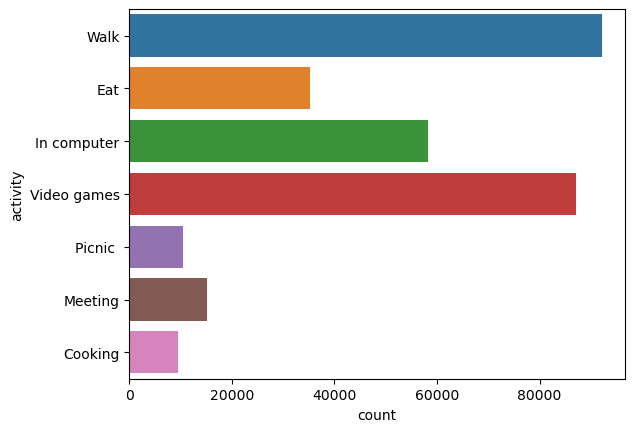

In [8]:
sns.countplot(y = label, data = label)

In [9]:
len(label)

307747

## split train and test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeaturesTable, label, test_size=0.20, random_state=42,shuffle=False)

Text(0.5, 1.0, 'Train Datset')

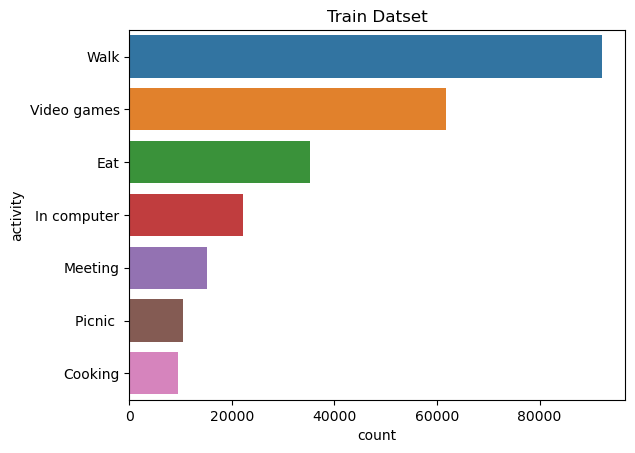

In [11]:
sns.countplot(y = y_train, order = y_train.value_counts().index).set_title('Train Datset')

Text(0.5, 1.0, 'Test Datset')

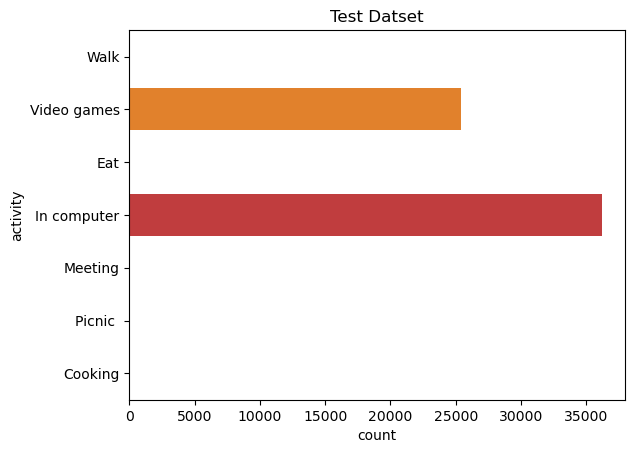

In [12]:
sns.countplot(y = y_test,order = y_train.value_counts().index).set_title('Test Datset')

## Standardize the Variables

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features_train = scaler.transform(X_train)
scaled_features_test = scaler.transform(X_test)

## Models

Given the data's imbalance, we avoid relying on accuracy as our primary model selection metric (suitable for balanced classes). Prioritize metrics like precision, recall, F1-score, and ROC-AUC that provide insights into the model's performance regarding the minority class. These metrics are more informative in imbalanced scenarios.

### F1_macro score

In [15]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

class PipelinesListMixin(object):
    @property
    def meta_estimators(self):
        scoring = 'f1_weighted'

        # Logistic Regression
        pipe_lr = Pipeline([('scl', StandardScaler()),
                            ('lr',  LogisticRegression(random_state=0))])
        param_grid = [{'lr__C': [10 ** int(C) for C in np.arange(-5, 5)],
                       'lr__penalty': ['l2', 'l1']}]
        gs_lr = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring=scoring, cv=2, n_jobs=5)

        # SVM
        pipe_svm = Pipeline([('scl', StandardScaler()),
                            ('svm', SVC(random_state=0))])
        param_grid = [{'svm__C': [10 ** int(C) for C in np.arange(-5, 5)],
                        'svm__kernel': ['linear']},
                      {'svm__C': [10 ** int(C) for C in np.arange(-5, 5)],
                        'svm__gamma': ['auto'],
                        'svm__kernel': ['rbf']}]
        gs_svm = GridSearchCV(estimator=pipe_svm, param_grid=param_grid, scoring=scoring, cv=2, n_jobs=5)

        pipe_tree = Pipeline([('tree', DecisionTreeClassifier(random_state=0))])
        param_grid = [{'tree__criterion': ['entropy'],
                       'tree__max_depth': [3]}]
        gs_tree = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=scoring, cv=2,
                                n_jobs=5)

        # Adaboost
        tree = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=1)
        pipe_ada = Pipeline([('adaboost', AdaBoostClassifier(base_estimator=tree, random_state=0))])
        param_grid = [{'adaboost__n_estimators': [500],
                        'adaboost__learning_rate': [0.1]}]
        gs_ada = GridSearchCV(estimator=pipe_ada, param_grid=param_grid, scoring=scoring, cv=2,
                              n_jobs=5)

        # Forest
        pipe_forest = Pipeline([('forest', RandomForestClassifier(random_state=0))])
        param_grid = [{'forest__criterion': ['entropy'],
                       'forest__n_estimators': [10],
                       'forest__max_depth': [None, 10, 20, 30]}]
        gs_forest = GridSearchCV(estimator=pipe_forest, param_grid=param_grid, scoring=scoring, cv=2,
                                  n_jobs=5)

        # KNN
        pipe_knn = Pipeline( [('knn', KNeighborsClassifier())])
        param_grid = [{'knn__n_neighbors': [5],
                        'knn__p': [2]}]
        gs_knn = GridSearchCV(estimator=pipe_knn, param_grid=param_grid, scoring=scoring, cv=2,
                              n_jobs=5)
        
        #return [gs_lr, gs_svm, gs_ada, gs_tree, gs_forest, gs_knn] 
        return [gs_lr, gs_ada, gs_tree, gs_forest, gs_knn] 


class ComparingClassifiers(PipelinesListMixin):
    def fit(self, X, y, scoring):
        algorithm_scores = []
        for gs in self.meta_estimators:
            #In each cross validation of cross_val_score function the GridSearchCV (gs) is working and run internal cross validation.
            #The aim is to do another level of validation set - for selecting the best algorithm.
            scores = cross_val_score(gs, X, y, scoring=scoring, cv=5, n_jobs=10)
            mean_scores = np.mean(scores) # Scores of all best models of the same algorithm (on each of the iterations of the outer cross validation).
            algorithm_scores.append(mean_scores)
            print('Mean score: ${:.3f}$ for algorithm: ${}$'.format(mean_scores, gs.estimator.steps[-1][0]))
        best_grid_search = self.meta_estimators[np.argmax(algorithm_scores)]
        return best_grid_search.fit(X, y)

best_algorithm = ComparingClassifiers().fit(X_train, y_train, 'f1_weighted')
print('The best algorithm is: ${}$. The accurate on all training data is: ${}$'.format(best_algorithm.estimator.steps[-1][0], best_algorithm.score(X_train, y_train)))

Mean score: $0.417$ for algorithm: $lr$
Mean score: $0.478$ for algorithm: $adaboost$
Mean score: $0.407$ for algorithm: $tree$
Mean score: $0.534$ for algorithm: $forest$
Mean score: $0.499$ for algorithm: $knn$
The best algorithm is: $forest$. The accurate on all training data is: $0.6446712384696927$


In [16]:
# Check model preformance on the best model 
from sklearn.metrics import classification_report,confusion_matrix
pred = best_algorithm.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[    0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0]
 [   25  4534  3553   177   126 15048 12715]
 [    0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0]
 [  204  1397  1095   124   104 20028  2420]
 [    0     0     0     0     0     0     0]]


c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Cooking       0.00      0.00      0.00         0
         Eat       0.00      0.00      0.00         0
 In computer       0.76      0.10      0.17     36178
     Meeting       0.00      0.00      0.00         0
     Picnic        0.00      0.00      0.00         0
 Video games       0.57      0.79      0.66     25372
        Walk       0.00      0.00      0.00         0

    accuracy                           0.38     61550
   macro avg       0.19      0.13      0.12     61550
weighted avg       0.68      0.38      0.38     61550



c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.ensemble import RandomForestClassifier
pipe_forest = Pipeline([('forest', RandomForestClassifier(random_state=0))])
param_grid = [{'forest__criterion': ['entropy'],
               'forest__n_estimators': [10],
               'forest__max_depth': [None, 10, 20, 30]}]
gs_forest = GridSearchCV(estimator=pipe_forest, param_grid=param_grid, scoring='accuracy', cv=2,
                            n_jobs=5)

gs_forest.fit(X_train, y_train)
best_params = gs_forest.best_params_
best_rf_model = gs_forest.best_estimator_
best_max_depth = best_params['forest__max_depth']
print("Best Max Depth:", best_max_depth)

Best Max Depth: 10


In [18]:
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=10, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[    0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0]
 [   25  4534  3553   177   126 15048 12715]
 [    0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0]
 [  204  1397  1095   124   104 20028  2420]
 [    0     0     0     0     0     0     0]]


c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Cooking       0.00      0.00      0.00         0
         Eat       0.00      0.00      0.00         0
 In computer       0.76      0.10      0.17     36178
     Meeting       0.00      0.00      0.00         0
     Picnic        0.00      0.00      0.00         0
 Video games       0.57      0.79      0.66     25372
        Walk       0.00      0.00      0.00         0

    accuracy                           0.38     61550
   macro avg       0.19      0.13      0.12     61550
weighted avg       0.68      0.38      0.38     61550



c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Check the importance of each feature

In [19]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

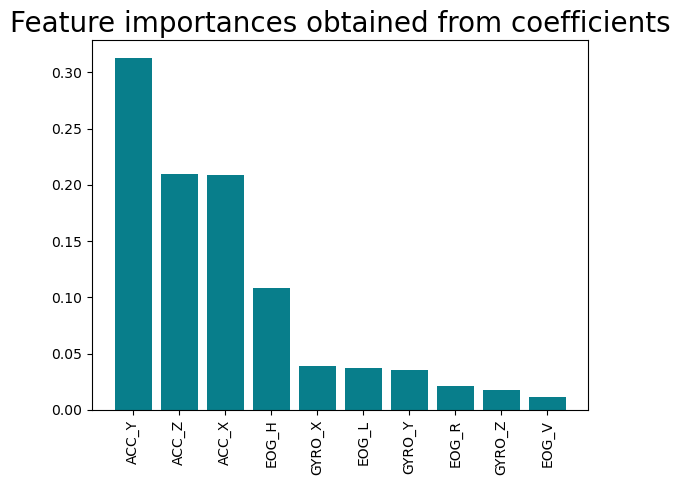

In [20]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Re-run the model using only the 5 most important features

In [21]:
featurereList = list(importances['Attribute'][:5])
X_train_part = X_train[featurereList]
X_test_part  = X_test[featurereList]

In [22]:
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=10, random_state=0)
clf.fit(X_train_part, y_train)
pred = clf.predict(X_test_part)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[    0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0]
 [   47  4085  3699   211   134 15385 12617]
 [    0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0]
 [  165  1661  1395    98   213 19567  2273]
 [    0     0     0     0     0     0     0]]


c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Cooking       0.00      0.00      0.00         0
         Eat       0.00      0.00      0.00         0
 In computer       0.73      0.10      0.18     36178
     Meeting       0.00      0.00      0.00         0
     Picnic        0.00      0.00      0.00         0
 Video games       0.56      0.77      0.65     25372
        Walk       0.00      0.00      0.00         0

    accuracy                           0.38     61550
   macro avg       0.18      0.12      0.12     61550
weighted avg       0.66      0.38      0.37     61550



c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Re-run the model using only the 5 least important features

In [23]:
featurereList = list(importances['Attribute'][-5:])
X_train_part = X_train[featurereList]
X_test_part  = X_test[featurereList]

In [24]:
clf = RandomForestClassifier(n_estimators=10, criterion ='entropy', max_depth=10, random_state=0)
clf.fit(X_train_part, y_train)
pred = clf.predict(X_test_part)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[    0     0     0     0     0]
 [    0     0     0     0     0]
 [  580   351     3 28734  6510]
 [   89    99     2 20504  4678]
 [    0     0     0     0     0]]


c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Cooking       0.00      0.00      0.00         0
         Eat       0.00      0.00      0.00         0
 In computer       0.60      0.00      0.00     36178
 Video games       0.42      0.81      0.55     25372
        Walk       0.00      0.00      0.00         0

    accuracy                           0.33     61550
   macro avg       0.20      0.16      0.11     61550
weighted avg       0.52      0.33      0.23     61550



c:\Users\asafl\anaconda3\envs\Daniel\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
